<a href="https://colab.research.google.com/github/nguyendoanquangnhat/Fuzzy-Logic/blob/main/FuzzyLogic_EX5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#EX5.1: Automobile cruise control

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=33a86d76a5e259950ff81a52dad25c8b26c9b04abc88b9a975785b27a374b1ef
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


440.4761904761907


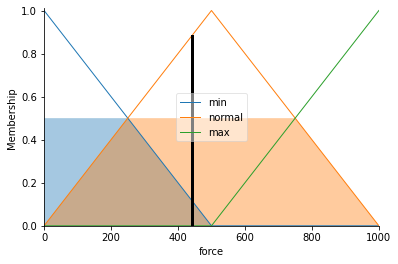

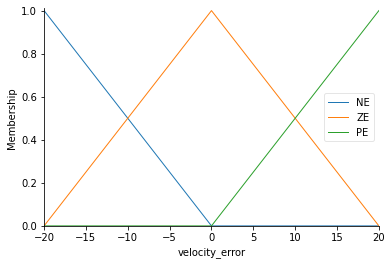

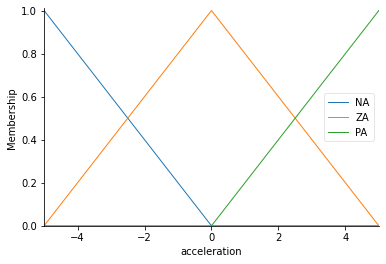

In [9]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

velocity_error = ctrl.Antecedent(np.arange(-20,21,1),'velocity_error')
acceleration = ctrl.Antecedent(np.arange(-5,6,1),'acceleration')
force = ctrl.Consequent(np.arange(0,1001,1),'force')

velocity_error['NE'] = fuzz.trimf(velocity_error.universe,[-20,-20,0])
velocity_error['ZE'] = fuzz.trimf(velocity_error.universe,[-20,0,20])
velocity_error['PE'] = fuzz.trimf(velocity_error.universe,[0,20,20])

acceleration['NA'] = fuzz.trimf(acceleration.universe,[-5,-5,0])
acceleration['ZA'] = fuzz.trimf(acceleration.universe,[-5,0,5])
acceleration['PA'] = fuzz.trimf(acceleration.universe,[0,5,5])

force['min'] = fuzz.trimf(force.universe,[0,0,500])
force['normal'] = fuzz.trimf(force.universe,[0,500,1000])
force['max'] = fuzz.trimf(force.universe,[500,1000,1000])

rule1 = ctrl.Rule(velocity_error['NE'] & acceleration['NA'], force['min'])
rule2 = ctrl.Rule(velocity_error['ZE'] & acceleration['NA'], force['normal'])
rule3 = ctrl.Rule(velocity_error['PE'] & acceleration['NA'], force['max'])
rule4 = ctrl.Rule(velocity_error['NE'] & acceleration['ZA'], force['min'])
rule5 = ctrl.Rule(velocity_error['ZE'] & acceleration['ZA'], force['normal'])
rule6 = ctrl.Rule(velocity_error['PE'] & acceleration['ZA'], force['max'])
rule7 = ctrl.Rule(velocity_error['NE'] & acceleration['PA'], force['min'])
rule8 = ctrl.Rule(velocity_error['ZE'] & acceleration['PA'], force['normal'])
rule9 = ctrl.Rule(velocity_error['PE'] & acceleration['PA'], force['max'])

forcecontrol_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
forcecontrol = ctrl.ControlSystemSimulation(forcecontrol_ctrl)
forcecontrol.input['velocity_error'] = -10
forcecontrol.input['acceleration'] = 3
forcecontrol.compute()
print(forcecontrol.output['force'])
force.view(sim=forcecontrol)

velocity_error.view()
acceleration.view()